In [17]:

import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


os.makedirs("reports", exist_ok=True)

sys.path.append("..")
from src.ingest_data import load_insurance_data, save_processed_data
from src.eda_utils import dataset_overview, plot_missing_values, plot_correlation, summary_statistics

sns.set(style="whitegrid")
pd.set_option("display.max_columns", 200)


In [8]:
RAW_FILENAME = "MachineLearningRating_v3.txt"
RAW_PATH = os.path.join("..","data", "raw", RAW_FILENAME)

# Load the data with | separator
df = pd.read_csv(RAW_PATH, sep="|", low_memory=False)

# Show shape and first few rows
print(f"Data shape: {df.shape}")
df.head(3)


Data shape: (1000098, 52)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,NumberOfVehiclesInFleet,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [9]:

print("Columns:", len(df.columns))
print(df.columns.tolist())
print("\nDtypes preview:")
print(df.dtypes.value_counts())
print("\nSample rows:")
display(df.sample(3))


Columns: 52
['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']

Dtypes preview:
object     36
float64    11
int64       4
bool        1
Name: count, dtype: int64

Sample rows:


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,NumberOfVehiclesInFleet,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
899714,54235,4958,2014-09-01 00:00:00,False,,Public company,Mr,English,Standard Bank,Current account,Not specified,Not specified,South Africa,Mpumalanga,1050,Transvaal (all except Pretoria),Transvaal East,Mobility - Motor,60058418.0,Passenger Vehicle,2011,TOYOTA,QUANTUM 2.7 SESFIKILE 15s,4.0,2694.0,111.0,B/S,4.0,10/2010,NaN,Yes,Yes,0,NaN,NaN,NaN,NaN,NaN,NaN,7500.0,Monthly,5.6983,No excess,Emergency Charges,Emergency Charges,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,4.998509,0.0
322215,238234,20846,2015-06-01 00:00:00,False,,Individual,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Limpopo,742,Transvaal (all except Pretoria),Transvaal North,Mobility - Motor,21518200.0,Passenger Vehicle,2013,FOTON,INKUNZI 2.2 TAXI,4.0,2237.0,76.0,B/S,4.0,10/2009,NaN,Yes,No,0,More than 6 months,NaN,NaN,NaN,NaN,NaN,5000.0,Monthly,2.7346,No excess,Keys and Alarms,Keys and Alarms,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.398772,0.0
255812,69449,5492,2015-05-01 00:00:00,False,,Individual,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1,Transvaal (Pretoria),Pretoria,Mobility - Motor,60058419.0,Passenger Vehicle,2013,TOYOTA,QUANTUM 2.7 SESFIKILE 16s,4.0,2694.0,111.0,B/S,4.0,4/2012,NaN,Yes,No,0,More than 6 months,NaN,NaN,NaN,NaN,NaN,7000.0,Monthly,85.0000,No excess,Income Protector,Income Protector,Income Protector,Optional Extended Covers,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,74.561404,0.0


In [10]:
dataset_overview(df)



--- SHAPE ---
(1000098, 52)

--- COLUMNS ---
['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']

--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column              

In [13]:

NUMERIC_CANDIDATES = [
    "Cylinders", "cubiccapacity", "kilowatts", "NumberOfDoors",
    "CustomValueEstimate", "CapitalOutstanding", "NumberOfVehiclesInFleet",
    "SumInsured", "CalculatedPremiumPerTerm", "TotalPremium", "TotalClaims"
]

DATE_CANDIDATES = ["TransactionMonth", "VehicleIntroDate"]  # parse to datetime if present
CATEGORY_CANDIDATES = [
    "Province", "PostalCode", "MainCrestaZone", "SubCrestaZone",
    "VehicleType", "make", "Model", "Gender", "CoverType", "CoverCategory",
    "StatutoryClass", "StatutoryRiskType"
]

# detect which candidate columns are present
numeric_cols = [c for c in NUMERIC_CANDIDATES if c in df.columns]
date_cols = [c for c in DATE_CANDIDATES if c in df.columns]
cat_cols = [c for c in CATEGORY_CANDIDATES if c in df.columns]

print("Numeric cols found:", numeric_cols)
print("Date cols found:", date_cols)
print("Categorical cols found:", cat_cols[:10], "... (showing first 10)")


Numeric cols found: ['Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CustomValueEstimate', 'CapitalOutstanding', 'NumberOfVehiclesInFleet', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']
Date cols found: ['TransactionMonth', 'VehicleIntroDate']
Categorical cols found: ['Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'VehicleType', 'make', 'Model', 'Gender', 'CoverType', 'CoverCategory'] ... (showing first 10)


In [14]:

for d in date_cols:
    df[d] = pd.to_datetime(df[d], errors="coerce")

# 7.2 Convert numeric-like object columns to numeric
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# 7.3 Trim whitespace and make categorical strings consistent
for c in cat_cols:
    df[c] = df[c].astype(str).str.strip()
    # preserve NaNs introduced earlier - replace 'nan' strings
    df.loc[df[c].str.lower() == 'nan', c] = np.nan

# 7.4 Provide a quick dtype summary after conversions
print(df[numeric_cols].dtypes)
print(df[date_cols].dtypes if date_cols else "no date cols converted")


C:\Users\naima\AppData\Local\Temp\ipykernel_16628\4064233152.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[d] = pd.to_datetime(df[d], errors="coerce")


Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
NumberOfDoors               float64
CustomValueEstimate         float64
CapitalOutstanding          float64
NumberOfVehiclesInFleet     float64
SumInsured                  float64
CalculatedPremiumPerTerm    float64
TotalPremium                float64
TotalClaims                 float64
dtype: object
TransactionMonth    datetime64[ns]
VehicleIntroDate    datetime64[ns]
dtype: object


NumberOfVehiclesInFleet    100.000000
CrossBorder                 99.930207
CustomValueEstimate         77.956560
Rebuilt                     64.183810
Converted                   64.183810
WrittenOff                  64.183810
NewVehicle                  15.327998
Bank                        14.594670
AccountType                  4.022806
Gender                       0.953507
MaritalStatus                0.825819
VehicleType                  0.055195
make                         0.055195
mmcode                       0.055195
Model                        0.055195
Cylinders                    0.055195
bodytype                     0.055195
kilowatts                    0.055195
NumberOfDoors                0.055195
VehicleIntroDate             0.055195
cubiccapacity                0.055195
CapitalOutstanding           0.032197
dtype: float64

Saved missing percent to reports/missing_percentages_task2.csv


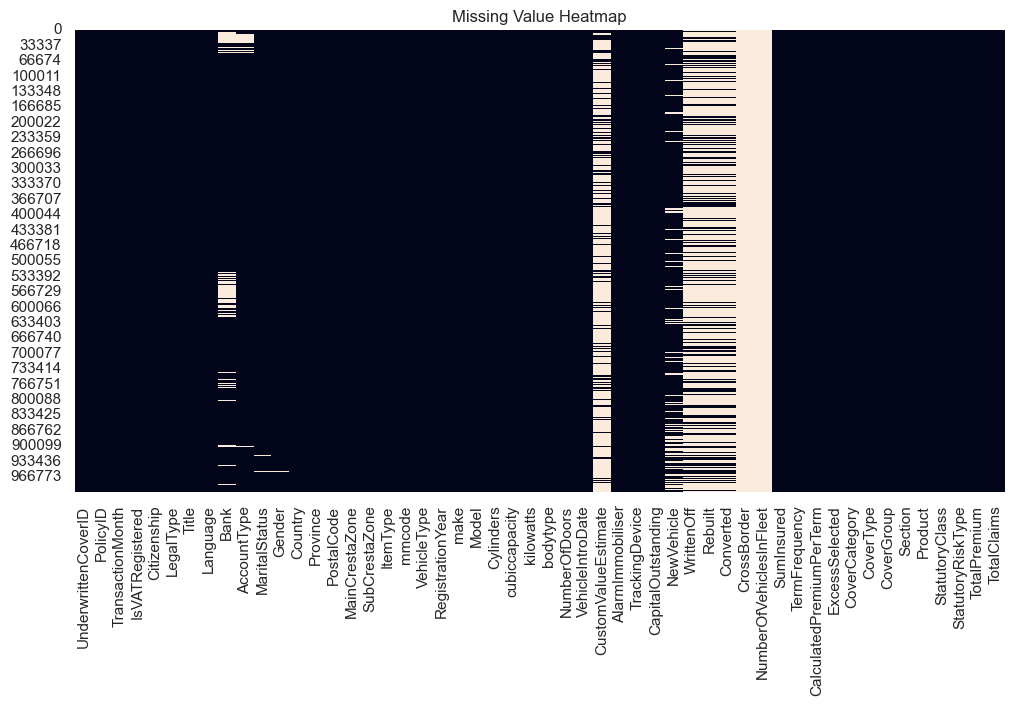

In [18]:

missing_pct = df.isna().mean().sort_values(ascending=False) * 100
missing_pct_top = missing_pct[missing_pct > 0]
display(missing_pct_top.head(60))  # show up to 60 rows with missing values

missing_pct.to_csv("../reports/missing_percentages_task2.csv")
print("Saved missing percent to reports/missing_percentages_task2.csv")

# Visualize
plot_missing_values(df, save_path="reports")

In [19]:

high_missing_threshold = 0.60
high_missing_cols = list(missing_pct[missing_pct/100 > high_missing_threshold].index)
print("High-missing columns (>60%):", high_missing_cols)

# If any, drop them
if high_missing_cols:
    print("Dropping high-missing columns to keep dataset tidy.")
    df.drop(columns=high_missing_cols, inplace=True)

# 10.2 Impute numeric columns with median
numeric_cols_present = [c for c in numeric_cols if c in df.columns]
for col in numeric_cols_present:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# 10.3 Impute categorical columns with mode (or 'MISSING')
cat_cols_present = [c for c in cat_cols if c in df.columns]
for col in cat_cols_present:
    if df[col].isna().sum() > 0:
        mode_val = df[col].mode(dropna=True)
        if len(mode_val) > 0:
            df[col].fillna(mode_val[0], inplace=True)
        else:
            df[col].fillna("MISSING", inplace=True)

# 10.4 Final missing check
print("Remaining missing (should be small or zero):")
display(df.isna().sum().sort_values(ascending=False).head(30))


High-missing columns (>60%): ['NumberOfVehiclesInFleet', 'CrossBorder', 'CustomValueEstimate', 'Rebuilt', 'Converted', 'WrittenOff']
Dropping high-missing columns to keep dataset tidy.


C:\Users\naima\AppData\Local\Temp\ipykernel_16628\3262211316.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\naima\AppData\Local\Temp\ipykernel_16628\3262211316.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

Remaining missing (should be small or zero):


NewVehicle             153295
Bank                   145961
AccountType             40232
MaritalStatus            8259
mmcode                    552
bodytype                  552
VehicleIntroDate          552
Citizenship                 0
IsVATRegistered             0
Language                    0
LegalType                   0
TransactionMonth            0
UnderwrittenCoverID         0
PolicyID                    0
Province                    0
Country                     0
Gender                      0
Title                       0
ItemType                    0
VehicleType                 0
SubCrestaZone               0
PostalCode                  0
make                        0
RegistrationYear            0
Model                       0
Cylinders                   0
kilowatts                   0
cubiccapacity               0
NumberOfDoors               0
MainCrestaZone              0
dtype: int64

In [20]:

dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)
if dup_count > 0:
    df_before = df.shape[0]
    df = df.drop_duplicates()
    print("Dropped duplicates:", df_before - df.shape[0])
else:
    print("No duplicate rows found.")


Duplicate rows: 74
Dropped duplicates: 74


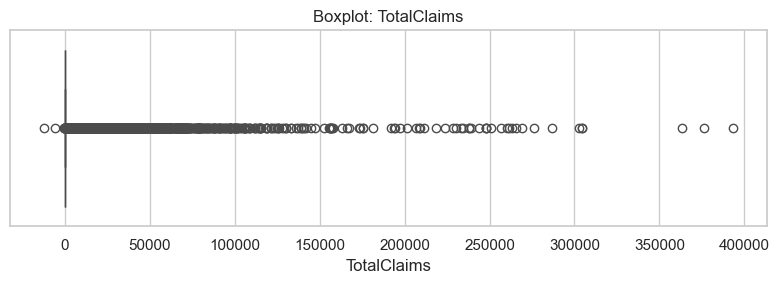

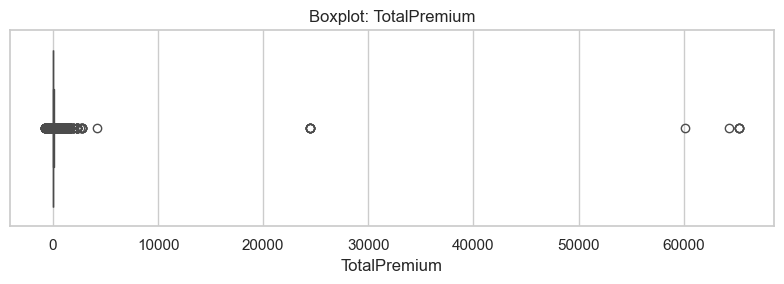

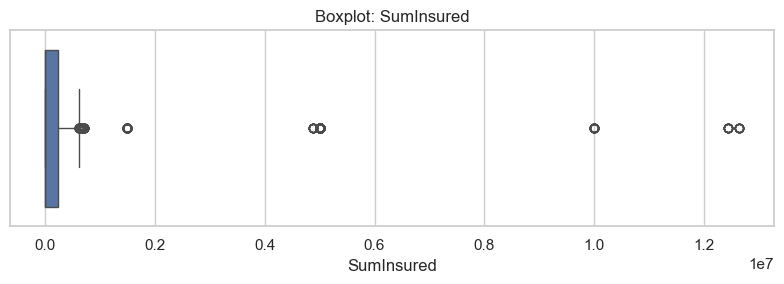

In [21]:

numeric_for_outliers = [c for c in ["TotalClaims", "TotalPremium", "CustomValueEstimate", "SumInsured"] if c in df.columns]

for c in numeric_for_outliers:
    plt.figure(figsize=(8,3))
    sns.boxplot(x=df[c])
    plt.title(f"Boxplot: {c}")
    plt.tight_layout()
    plt.savefig(f"reports/box_{c}.png")
    plt.show()


In [24]:
def winsorize_series(s, lower_q=0.01, upper_q=0.99):
    lower = s.quantile(lower_q)
    upper = s.quantile(upper_q)
    return s.clip(lower, upper)

# Apply winsorization safely
for c in numeric_for_outliers:
    df.loc[:, c] = winsorize_series(df[c], 0.01, 0.99)  # use .loc to avoid SettingWithCopyWarning

# Quick post-check: display new percentiles
for c in numeric_for_outliers:
    print(c, "-> 1%:", df[c].quantile(0.01), "99%:", df[c].quantile(0.99))


TotalClaims -> 1%: 0.0 99%: 0.0
TotalPremium -> 1%: 0.0 99%: 778.698157894737
SumInsured -> 1%: 0.01 99%: 5000000.0


In [26]:
# 14.1 Loss ratio (core business metric)
if ("TotalClaims" in df.columns) and ("TotalPremium" in df.columns):
    df.loc[:, "LossRatio"] = df["TotalClaims"] / df["TotalPremium"].replace({0: np.nan})
    # If premium 0 -> result NaN; fill with 0
    df.loc[:, "LossRatio"] = df["LossRatio"].fillna(0)

# 14.2 Claim frequency indicator (binary)
df.loc[:, "HasClaim"] = (df["TotalClaims"] > 0).astype(int)

# 14.3 Vehicle age (from RegistrationYear), guard for NaNs
if "RegistrationYear" in df.columns:
    # Convert to numeric safely
    df.loc[:, "RegistrationYear"] = pd.to_numeric(df["RegistrationYear"], errors="coerce")
    current_year = 2025  # set project year
    df.loc[:, "VehicleAge"] = current_year - df["RegistrationYear"]
    median_age = df["VehicleAge"].median()
    df.loc[:, "VehicleAge"] = df["VehicleAge"].clip(lower=0, upper=100).fillna(median_age)

# 14.4 Simple price-to-value ratio feature (optional)
if ("TotalPremium" in df.columns) and ("CustomValueEstimate" in df.columns):
    df.loc[:, "PremiumToValue"] = df["TotalPremium"] / df["CustomValueEstimate"].replace({0: np.nan})
    median_ptv = df["PremiumToValue"].median()
    df.loc[:, "PremiumToValue"] = df["PremiumToValue"].fillna(median_ptv)

# 14.5 Bucketing numeric features (example)
if "VehicleAge" in df.columns:
    df.loc[:, "VehicleAgeBin"] = pd.cut(
        df["VehicleAge"],
        bins=[-1,2,5,10,20,100],
        labels=["0-2","3-5","6-10","11-20","20+"]
    )


In [29]:
# Convert categorical columns safely
for c in cat_cols_present:
    if c in df.columns:
        df.loc[:, c] = df[c].astype("category")

# Convert PostalCode to string and strip whitespace
if "PostalCode" in df.columns:
    df.loc[:, "PostalCode"] = df["PostalCode"].astype(str).str.strip()

# Final dtype summary
df.dtypes.value_counts()


object            19
float64           11
int64              5
datetime64[ns]     2
bool               1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
Name: count, dtype: int64

In [31]:

processed_fname = "insurance_cleaned.csv"
processed_relpath = os.path.join("..","data", "processed", processed_fname)
# ensure processed directory exists
os.makedirs(os.path.dirname(processed_relpath), exist_ok=True)

df.to_csv(processed_relpath, index=False)
print("Saved cleaned dataset to:", processed_relpath)

# Also use the ingest helper if you want (this will perform same save)
try:
    save_processed_data(df, processed_fname)
except Exception as e:
    print("save_processed_data helper not used or failed; saved manually above.")


Saved cleaned dataset to: ..\data\processed\insurance_cleaned.csv
Processed data saved to data/processed\insurance_cleaned.csv


In [32]:

num_summary, cat_summary = summary_statistics(df, save_path="reports")
print("Saved numeric & categorical summaries to reports/")

# Save a quick sample and counts
df.sample(5).to_csv("reports/sample_rows_after_cleaning.csv", index=False)
df[["LossRatio", "HasClaim"]].describe().to_csv("reports/loss_claim_summary.csv")
print("Saved additional diagnostic CSVs in reports/")


Saved numeric & categorical summaries to reports/
Saved additional diagnostic CSVs in reports/
